## Time Series
Source: Wikipedia

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values. While regression analysis is often employed in such a way as to test theories that the current values of one or more independent time series affect the current value of another time series, this type of analysis of time series is not called "time series analysis", which focuses on comparing values of a single time series or multiple dependent time series at different points in time. Interrupted time series analysis is the analysis of interventions on a single time series.

__Prediction and forecasting__  

In statistics, prediction is a part of statistical inference. One particular approach to such inference is known as predictive inference, but the prediction can be undertaken within any of the several approaches to statistical inference. Indeed, one description of statistics is that it provides a means of transferring knowledge about a sample of a population to the whole population, and to other related populations, which is not necessarily the same as prediction over time. When information is transferred across time, often to specific points in time, the process is known as forecasting.

https://en.wikipedia.org/wiki/Time_series

Commonly used for time series analysis:
 - financial prices
 - weather
 - gas prices
 - energy usage
 

Import the libaries to use 

>`import numpy as np`  
>`import pandas as pd`  
>`import matplotlib.pyplot as plt`  
>`from sklearn.linear_model import LinearRegression`  

In [1]:
# type the code to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

We are going to create a dataframe with the values.

In [5]:
# run this cell

data = [[2008, 1, 20], [2008, 2, 30], [2008, 3, 39], [2008, 4, 60],
        [2009, 1, 40], [2009, 2, 51], [2009, 3, 62], [2009, 4, 81],
        [2010, 1, 50], [2010, 2, 64], [2010, 3, 74], [2010, 4, 95]]

df = pd.DataFrame(data, columns = ['year', 'quarter', 'units'])
df

,year,quarter,units
0,2008,1,20
1,2008,2,30
2,2008,3,39
3,2008,4,60
4,2009,1,40
5,2009,2,51
6,2009,3,62
7,2009,4,81
8,2010,1,50
9,2010,2,64


We have created columns for year, quarter and units (representing units sold). For time series, we will need to create an axis for time. We will create this column and insert a value for each row, but first will create an array for the values.

>`x = np.arange(1, len(df)+1)`  
>`x`  

In [6]:
# type the code to create the array and display the result
x = np.arange(1, len(df)+1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Now we will add the column to the dataframe with the values from the array and display the result

>`df = pd.concat([df, pd.DataFrame(x, columns=['x'])], axis=1)`  
>`df = df[['year', 'quarter', 'x', 'units']]`  
>`df`

In [7]:
# type the code to add the x column to the dataframe
df = pd.concat([df, pd.DataFrame(x, columns=['x'])], axis=1)
df = df[['year', 'quarter', 'x', 'units']]
df

,year,quarter,x,units
0,2008,1,1,20
1,2008,2,2,30
2,2008,3,3,39
3,2008,4,4,60
4,2009,1,5,40
5,2009,2,6,51
6,2009,3,7,62
7,2009,4,8,81
8,2010,1,9,50
9,2010,2,10,64


We can view the summary of the data.
>`df.describe()`  

In [8]:
# type the code to describe the data
df.describe()

,year,quarter,x,units
count,12.000000,12.000000,12.000000,12.000000
mean,2009.000000,2.500000,6.500000,55.500000
std,0.852803,1.167748,3.605551,21.660605
min,2008.000000,1.000000,1.000000,20.000000
25%,2008.000000,1.750000,3.750000,39.750000
50%,2009.000000,2.500000,6.500000,55.500000
75%,2010.000000,3.250000,9.250000,66.500000
max,2010.000000,4.000000,12.000000,95.000000


#### Moving Averages
Moving averages are used to smooth out the differences in seasonality. It can reduce the random variation in the data.

To calculate the moving average, we will use the `rolling` function to calculate the average for the current quarter and the 3 previous quarters.

>`df['ma']=df['units'].rolling(window=4,center=False).mean()`  
>`df`


In [9]:
# type the code to get the moving averages
df['ma']=df['units'].rolling(window=4,center=False).mean()
df

,year,quarter,x,units,ma
0,2008,1,1,20,NaN
1,2008,2,2,30,NaN
2,2008,3,3,39,NaN
3,2008,4,4,60,37.25
4,2009,1,5,40,42.25
5,2009,2,6,51,47.50
6,2009,3,7,62,53.25
7,2009,4,8,81,58.50
8,2010,1,9,50,61.00
9,2010,2,10,64,64.25


Next we will need to get the centered average. This is the average of the next 2 moving averages. 

We will use a lambda function to calculate the value for each row.

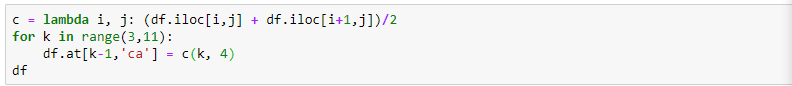

In [10]:
# type the code for the lambda function and display the resulting dataframe
c = lambda i, j: (df.iloc[i,j] + df.iloc[i+1,j])/2
for k in range(3,11):
    df.at[k-1,'ca'] = c(k, 4)
df

,year,quarter,x,units,ma,ca
0,2008,1,1,20,NaN,NaN
1,2008,2,2,30,NaN,NaN
2,2008,3,3,39,NaN,39.750
3,2008,4,4,60,37.25,44.875
4,2009,1,5,40,42.25,50.375
5,2009,2,6,51,47.50,55.875
6,2009,3,7,62,53.25,59.750
7,2009,4,8,81,58.50,62.625
8,2010,1,9,50,61.00,65.750
9,2010,2,10,64,64.25,69.000


Next we will calculate the percentage of the average to each row. This is where you start to see the seasonality.

>`df['avg'] = df.apply(lambda row: row.y/row.ca, axis=1)`  
>`df`

In [11]:
# type the code to calculate the avg
df['avg'] = df.apply(lambda row: row.units/row.ca, axis=1)
df

,year,quarter,x,units,ma,ca,avg
0,2008,1,1,20,NaN,NaN,NaN
1,2008,2,2,30,NaN,NaN,NaN
2,2008,3,3,39,NaN,39.750,0.981132
3,2008,4,4,60,37.25,44.875,1.337047
4,2009,1,5,40,42.25,50.375,0.794045
5,2009,2,6,51,47.50,55.875,0.912752
6,2009,3,7,62,53.25,59.750,1.037657
7,2009,4,8,81,58.50,62.625,1.293413
8,2010,1,9,50,61.00,65.750,0.760456
9,2010,2,10,64,64.25,69.000,0.927536


Now we will group the rows by the quarter to get the quarterly average. 

>`t = df.groupby(['quarter'], as_index=False)[['avg']].mean()`  
>`t`

In [12]:
# type the code
t = df.groupby(['quarter'], as_index=False)[['avg']].mean()
t

,quarter,avg
0,1,0.777250
1,2,0.920144
2,3,1.009394
3,4,1.315230


Then rename the column avg to q_mean.

>`t.rename(index=str, columns={'avg': 'q_mean'}, inplace=True)`  
>`t`

In [13]:
# type the code
t.rename(index=str, columns={'avg': 'q_mean'}, inplace=True)
t

,quarter,q_mean
0,1,0.777250
1,2,0.920144
2,3,1.009394
3,4,1.315230


Show the sum of the q_mean (or quarterly mean). This should be exactly 4 

>`sum(t['q_mean'])`

In [14]:
# type the code
sum(t['q_mean'])

4.0220191775818

As our q_mean is not exactly 4, we will calculate an adjustment number to help calculate the seasonal index.

>`adj_factor = 4/sum(t['q_mean'])`  
>`adj_factor`

In [15]:
# type the code
adj_factor = 4/sum(t['q_mean'])
adj_factor

0.9945253424686455

One last step! Now we apply the adjustment factor to the quarterly averages (q_mean) to adjust the estimate.

>`t['s_index'] = t.apply(lambda row: row.q_mean*adj_factor, axis = 1)`  
>`t`

In [17]:
# type the code
t['s_index'] = t.apply(lambda row: row.q_mean*adj_factor, axis = 1)
t

,quarter,q_mean,s_index
0,1,0.777250,0.772995
1,2,0.920144,0.915106
2,3,1.009394,1.003868
3,4,1.315230,1.308030


Now that we have calculated everything, we can plot the data.
>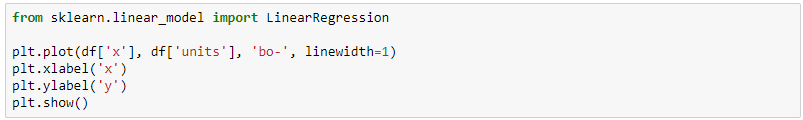

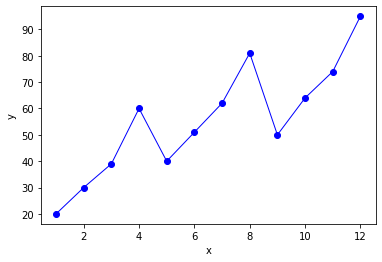

In [18]:
# type the code to plot the data
plt.plot(df['x'], df['units'], 'bo-', linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We will fit the linear regression model to our data.

>`reg = LinearRegression().fit(df[['x']], df[['y']])`  
>`reg`

In [19]:
# type the code
reg = LinearRegression().fit(df[['x']], df[['units']])
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We need the slope and intercept in order to plot the regression line.

>`b1 = reg.coef_[0][0]`  
>`b0 = reg.intercept_[0]` 

In [20]:
# type the code
b1 = reg.coef_[0][0]
b0 = reg.intercept_[0]

Now we will make a dataframe to hold the predicted values. 

>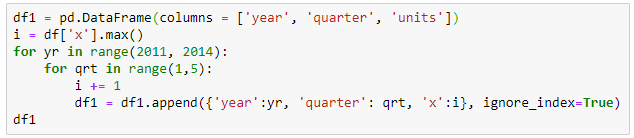

In [21]:
# type the code
df1 = pd.DataFrame(columns = ['year', 'quarter', 'units'])
i = df['x'].max()
for yr in range(2011, 2014):
    for qrt in range(1,5):
        i += 1
        df1 = df1.append({'year':yr, 'quarter': qrt, 'x':i}, ignore_index=True)
df1

,year,quarter,units,x
0,2011.0,1.0,NaN,13.0
1,2011.0,2.0,NaN,14.0
2,2011.0,3.0,NaN,15.0
3,2011.0,4.0,NaN,16.0
4,2012.0,1.0,NaN,17.0
5,2012.0,2.0,NaN,18.0
6,2012.0,3.0,NaN,19.0
7,2012.0,4.0,NaN,20.0
8,2013.0,1.0,NaN,21.0
9,2013.0,2.0,NaN,22.0


We added a column for units, but they came out empty. We will use a lambda function to calculate the units for each quarter based on the slope and intercept applied against column x.

>`df1['units'] = df1.apply(lambda row: row.x*b1+b0, axis = 1)`  
>`df1` 

In [22]:
# type the code
df1['units'] = df1.apply(lambda row: row.x*b1+b0, axis = 1)
df1

,year,quarter,units,x
0,2011.0,1.0,89.136364,13.0
1,2011.0,2.0,94.311189,14.0
2,2011.0,3.0,99.486014,15.0
3,2011.0,4.0,104.660839,16.0
4,2012.0,1.0,109.835664,17.0
5,2012.0,2.0,115.010490,18.0
6,2012.0,3.0,120.185315,19.0
7,2012.0,4.0,125.360140,20.0
8,2013.0,1.0,130.534965,21.0
9,2013.0,2.0,135.709790,22.0


Recall that we created a variable __t__ which holds the seasonal index information.
>`t['s_index']`

In [23]:
# type the code
t['s_index']

0    0.772995
1    0.915106
2    1.003868
3    1.308030
Name: s_index, dtype: float64

We will create a function to adjust the units based on the seasonal index. This will adjust the units for each quarter when we call the function.

>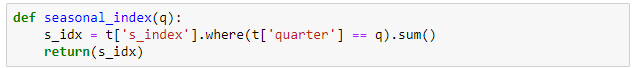

In [24]:
# type the code
def seasonal_index(q):
    s_idx = t['s_index'].where(t['quarter'] == q).sum()
    return(s_idx)

We will add a new column to the new dataframe to adjust the units by quarter.

>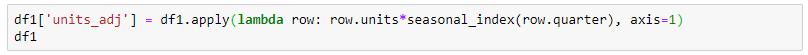

In [25]:
# type the code
df1['units_adj'] = df1.apply(lambda row: row.units*seasonal_index(row.quarter), axis=1)
df1

,year,quarter,units,x,units_adj
0,2011.0,1.0,89.136364,13.0,68.901989
1,2011.0,2.0,94.311189,14.0,86.304780
2,2011.0,3.0,99.486014,15.0,99.870866
3,2011.0,4.0,104.660839,16.0,136.899499
4,2012.0,1.0,109.835664,17.0,84.902451
5,2012.0,2.0,115.010490,18.0,105.246844
6,2012.0,3.0,120.185315,19.0,120.650240
7,2012.0,4.0,125.360140,20.0,163.974802
8,2013.0,1.0,130.534965,21.0,100.902913
9,2013.0,2.0,135.709790,22.0,124.188909


Now that all the calculations are done, we will plot the results.

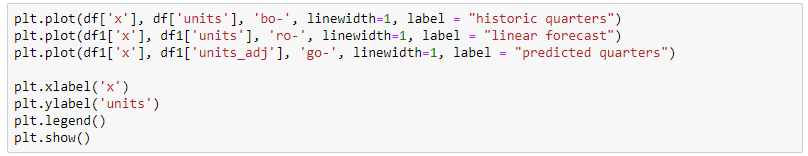

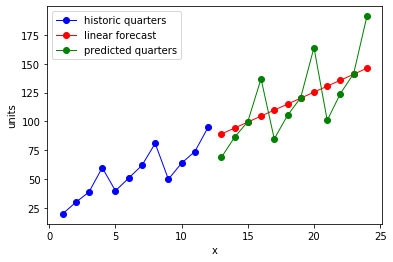

In [26]:
plt.plot(df['x'], df['units'], 'bo-', linewidth=1, label = "historic quarters")
plt.plot(df1['x'], df1['units'], 'ro-', linewidth=1, label = "linear forecast")
plt.plot(df1['x'], df1['units_adj'], 'go-', linewidth=1, label = "predicted quarters")

plt.xlabel('x')
plt.ylabel('units')
plt.legend()
plt.show()

Download this completed notebook and upload to the Teams Assignment to mark it as complete. 
#### File > Download as > Notebook (.ipynb)